## 신경망과 딥러닝
# MNIST 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0][10:15, 10:15] # 이미지는 행렬 또는 숫자표 이다

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

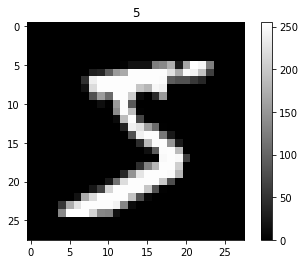

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.colorbar()

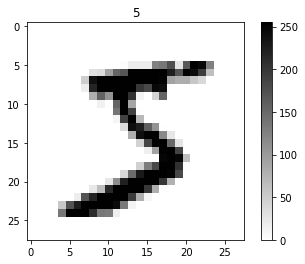

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.title(y_train[0])
plt.colorbar()

In [7]:
X_train.max(), X_train.min()

(255, 0)

In [9]:
np.bincount(y_train) # 숫자별 샘플 갯수

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

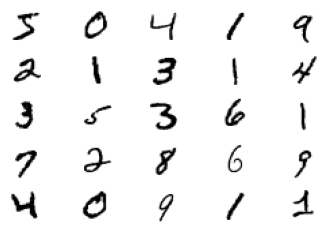

In [10]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.axis('off')

### 데이터 전처리
- 입력값을 1차원 데이터로 변환
- 입력값을 0 ~ 255 정수값에서 0.0 ~ 1.0 실수값으로 변환
- 목표값을 원핫인코딩(one-hot-encoding) 적용

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
X_train = X_train.reshape(60000, 28*28)/255
# X_train = X_train.reshape(-1, 28*28)/255 # -1 은 자동으로 계산하라는 의미임
X_test = X_test.reshape(10000, 28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [12]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [14]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
# y_train = keras.utils.to_categorical(y_train)
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### 단순분류 적용

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
> 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w2_1, ..., w784_1, b1
- 클래스값 1 -> w1_2, w2_2, ..., w784_2, b2
- 가중치갯수 = 784\*10, 절편갯수 = 10

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 소프트맥스 분류기
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 10s 6ms/step - loss: 0.5201 - acc: 0.8649 - val_loss: 0.3344 - val_acc: 0.9059
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3186 - acc: 0.9125 - val_loss: 0.3009 - val_acc: 0.9176
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2934 - acc: 0.9176 - val_loss: 0.2872 - val_acc: 0.9211
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2808 - acc: 0.9214 - val_loss: 0.2810 - val_acc: 0.9235
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2723 - acc: 0.9242 - val_loss: 0.2800 - val_acc: 0.9235
Epoch 6/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2668 - acc: 0.9249 - val_loss: 0.2789 - val_acc: 0.9226
Epoch 7/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2625 - acc: 0.9269 - val_loss: 0.2732 - val_acc: 0.9251
Epoch 8/20
1407/1407 [==============================] - 9s 6m

In [19]:
h = model.history.history

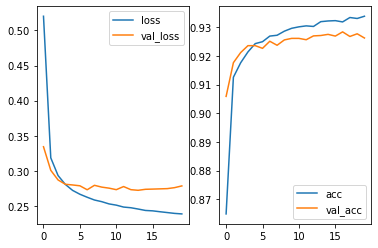

In [20]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 결과 분석

In [35]:
y_pred = model.predict(X_test)

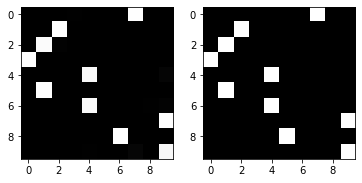

In [36]:
plt.subplot(1,2,1)
plt.imshow(y_pred[:10], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y_test[:10], cmap='gray')

In [37]:
(y_pred.argmax(axis=1)==y_test.argmax(axis=1)).mean() # accuracy for test data

0.9268

In [39]:
wrong = np.where(y_pred.argmax(axis=1)!=y_test.argmax(axis=1))[0]
wrong

array([   8,   33,   63,   66,  149,  211,  233,  241,  247,  259,  290,
        307,  313,  320,  321,  340,  344,  352,  362,  381,  391,  403,
        412,  435,  445,  478,  479,  502,  507,  528,  531,  536,  542,
        543,  551,  565,  569,  571,  578,  582,  583,  591,  619,  628,
        629,  659,  684,  691,  692,  707,  714,  717,  720,  740,  760,
        781,  791,  800,  829,  839,  844,  857,  877,  881,  890,  898,
        924,  938,  939,  947,  950,  951,  956,  965,  975,  999, 1003,
       1012, 1014, 1017, 1028, 1032, 1039, 1044, 1062, 1068, 1082, 1101,
       1107, 1112, 1114, 1124, 1128, 1157, 1181, 1182, 1191, 1192, 1194,
       1198, 1202, 1204, 1206, 1208, 1226, 1232, 1233, 1234, 1242, 1247,
       1256, 1260, 1283, 1289, 1299, 1310, 1315, 1319, 1320, 1325, 1326,
       1337, 1364, 1378, 1393, 1410, 1413, 1429, 1433, 1440, 1444, 1453,
       1465, 1467, 1469, 1494, 1500, 1522, 1525, 1527, 1530, 1549, 1553,
       1559, 1569, 1581, 1587, 1609, 1634, 1637, 16

Text(0.5, 1.0, '6/5')

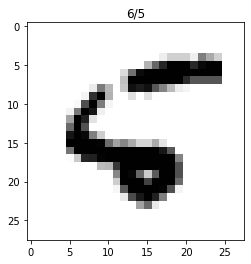

In [48]:
idx = wrong[0]
plt.imshow(X_test[idx].reshape(28,28), cmap='gray_r')
plt.title(str(y_pred[idx].argmax()) + '/' + str(y_test[idx].argmax()))

### 중간층 추가

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2867 - acc: 0.9165 - val_loss: 0.1657 - val_acc: 0.9505
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1254 - acc: 0.9630 - val_loss: 0.1267 - val_acc: 0.9635
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0857 - acc: 0.9738 - val_loss: 0.1069 - val_acc: 0.9677
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0647 - acc: 0.9804 - val_loss: 0.1138 - val_acc: 0.9666
Epoch 5/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0512 - acc: 0.9843 - val_loss: 0.1097 - val_acc: 0.9695
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0417 - acc: 0.9867 - val_loss: 0.1010 - val_acc: 0.9723
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0330 - acc: 0.9892 - val_loss: 0.1031 - val_acc: 0.9715
Epoch 8/20
1407/1407 [==============================] - 7s 5ms

In [21]:
h = model.history.history

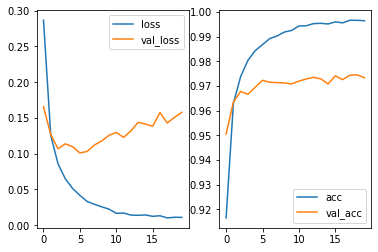

In [22]:
plt.subplot(1,2,1)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.legend(['acc', 'val_acc'])

### 가중치 분석

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [51]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5156 - acc: 0.8676 - val_loss: 0.3333 - val_acc: 0.9087
Epoch 2/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3183 - acc: 0.9120 - val_loss: 0.3019 - val_acc: 0.9161
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2931 - acc: 0.9177 - val_loss: 0.2886 - val_acc: 0.9191
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2807 - acc: 0.9211 - val_loss: 0.2811 - val_acc: 0.9227
Epoch 5/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2728 - acc: 0.9234 - val_loss: 0.2772 - val_acc: 0.9251
Epoch 6/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2668 - acc: 0.9248 - val_loss: 0.2770 - val_acc: 0.9239
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2624 - acc: 0.9270 - val_loss: 0.2730 - val_acc: 0.9262
Epoch 8/20
1407/1407 [==============================] - 8s 6ms

In [52]:
model.get_weights()

[array([[-0.05944946,  0.03441752,  0.03425357, ..., -0.01252823,
          0.0729033 , -0.02238545],
        [ 0.04864245,  0.03633901, -0.04682461, ...,  0.06261591,
          0.08034203, -0.07946003],
        [-0.02883977, -0.00535216, -0.0837629 , ..., -0.0064813 ,
         -0.01755079,  0.06818254],
        ...,
        [-0.06659495,  0.02782296, -0.0434272 , ..., -0.04953967,
         -0.06300034,  0.06387591],
        [-0.06031023, -0.06527948,  0.06676855, ..., -0.02833674,
         -0.07503416, -0.00397795],
        [-0.05343464,  0.01624241, -0.0819998 , ..., -0.02156497,
         -0.01035857,  0.02701816]], dtype=float32),
 array([-0.5250853 ,  0.81593   ,  0.12556195, -0.43237787,  0.21542047,
         1.6060325 , -0.26484   ,  0.90091187, -1.8008945 , -0.44088513],
       dtype=float32)]

In [53]:
W = model.get_weights()[0]
W.shape

(784, 10)

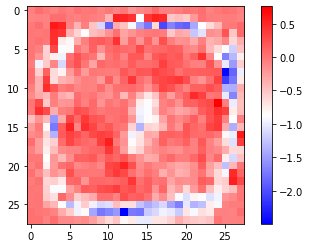

In [54]:
plt.imshow(W[:,0].reshape(28,28), cmap='bwr')
plt.colorbar()

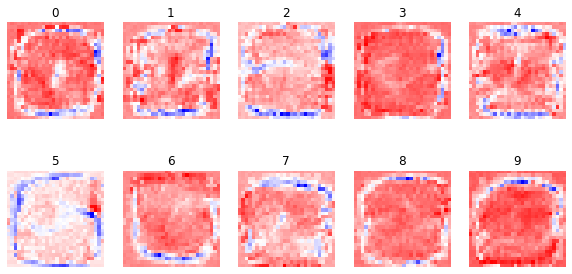

In [55]:
plt.figure(figsize=[10,5])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(W[:,i].reshape(28,28), cmap='bwr')
    plt.title(i)
    plt.axis('off')

### sparse 와 logit 옵션
- sparse 는 원핫인코딩과 관련
- logit 은 softmax 와 관련

In [56]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [57]:
X_train = X_train.reshape(60000, 28*28)/255
# X_train = X_train.reshape(-1, 28*28)/255 # -1 은 자동으로 계산하라는 의미임
X_test = X_test.reshape(10000, 28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,), activation='softmax'))

In [59]:
# y_train 을 원핫인코딩 적용하지 않는 경우, sparse_categorical_crossentropy 사용
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [60]:
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.25)

Epoch 1/2
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5236 - acc: 0.8672 - val_loss: 0.3352 - val_acc: 0.9095
Epoch 2/2
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3193 - acc: 0.9109 - val_loss: 0.2997 - val_acc: 0.9181


In [62]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(784,)))

In [64]:
# 출력층에 softmax를 사용하지 않는 경우
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss, optimizer='adam', metrics=['acc'])

In [65]:
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.25)

Epoch 1/2
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5175 - acc: 0.8652 - val_loss: 0.3299 - val_acc: 0.9088
Epoch 2/2
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3191 - acc: 0.9114 - val_loss: 0.2997 - val_acc: 0.9170


In [66]:
model.predict(X_test[:2])

array([[ -2.005446  , -10.793435  ,  -1.3811537 ,   1.9934031 ,
         -4.3804646 ,  -2.5635657 ,  -8.909702  ,   7.474088  ,
         -2.070041  ,   0.89321554],
       [ -0.3373617 ,  -4.462132  ,   5.9275837 ,  -0.298309  ,
        -14.819609  ,  -0.12175909,   1.2169389 , -18.297192  ,
         -1.3295711 , -12.411295  ]], dtype=float32)